In [14]:
import pandas as pd


def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

# column in csv
column = 'income'

df = pd.read_csv('fns_for_model.csv', delimiter=';')

In [15]:
df_income = df[(df['year'] == 2021) & (df['quarter'] == 3)]
income_sum = df_income[column].sum()
df2 = df_income.sort_values(by=column, ascending=False)
df2['income_hr'] = df2[column].apply(lambda val: human_format(val))

In [16]:
df2["revenue_cum"] = df2["income"].cumsum()

In [64]:
def cm_to_inch(value):
    return value/2.54

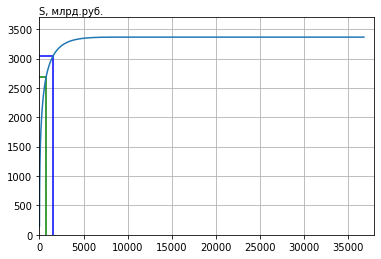

In [71]:
import matplotlib.pyplot as plt



left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height
l1 = list(df2['revenue_cum'])
fig, ax = plt.subplots()
ax.set_xlim(0, 38000)
ax.set_ylim(0, l1[-1]*1.1/1000000000)
ax.grid()

ax.plot(range(0, 36824), df2['revenue_cum']/1000000000, markersize = 3.) #sorted(list(df2['revenue_cum']), reverse=True))
#ax.ticklabel_format(useOffset=False, style='plain', axis='both')
#plt.ylabel("S, млрд.руб.")
ax.text(left, top, 'S, млрд.руб.',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
plt.vlines(x=764, ymin=0, ymax=l1[764]/1000000000, colors='green',linestyle='solid')
plt.vlines(x=1565, ymin=0, ymax=l1[1565]/1000000000, colors='blue',linestyle='solid')
plt.hlines(xmin=0, xmax = 764, y=l1[764]/1000000000, colors='green',linestyle='solid')
plt.hlines(xmin=0, xmax = 1565, y=l1[1565]/1000000000, colors='blue',linestyle='solid')
plt.show()
# fig.savefig("AS1-ABC-income.eps",format='eps')
# fig.savefig("AS1-ABC-income.svg",format='svg')
fig.savefig("AS1-ABC-income.png")

In [26]:
l1[36823]

3365269532443.0